# Second

In [45]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

Importing data

In [47]:
df = pd.read_csv('cubic_zirconia.csv')

In [48]:
# Check top few records to get a feel of the data structure
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [49]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [50]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [51]:
df.shape  # Checking the shape of the dataset.

(26967, 11)

In [52]:
#Getting the info data types column wise
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


Observation-1:
.The data set contains 26967 row, 11 columns .
.In the given data set there are 2 Integer type features,6 Float type features. 3 Object type features. Where 'price' is the target variable and all other are predector variable.
The first column is an index ("Unnamed: 0")as this only serial no, we can remove it.
Exept depth, in all the column non null count is 26967.

In [53]:
# drop the serial no column as it is useless for the model
lr_df = df.drop('Unnamed: 0', axis=1)

In [54]:
# Getting the summary statistics of the dataset
lr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [55]:
# Getting the summary statistics of the  object variable.
lr_df.describe(include=['object'])

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


In [56]:
# Checking for the values which are equal to zero.
print("Number of rows with x == 0: {} ".format((lr_df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((lr_df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((lr_df.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((lr_df.depth==0).sum()))

Number of rows with x == 0: 3 
Number of rows with y == 0: 3 
Number of rows with z == 0: 9 
Number of rows with depth == 0: 0 


In [57]:
lr_df.shape

(26967, 10)

In [58]:
#Dropping dimentionless diamonds
lr_df = lr_df.drop(lr_df[lr_df["x"]==0].index)
lr_df = lr_df.drop(lr_df[lr_df["y"]==0].index)
lr_df = lr_df.drop(lr_df[lr_df["z"]==0].index)
lr_df.shape

(26958, 10)

Observation-2: .On the given data set the the mean and median values does not have much differenc. .We can observe Min value of "x", "y", & "z" are zero this indicates that they are faulty values. As we know dimensionless or 2-dimensional diamonds are not possible. So we need to filter out those as it clearly faulty data entries. .There are three object data type 'cut', 'color' and 'clarity'.

### Performing EDA : We will follow the below mentioned steps to perform EDA

Step 1 :Checking & Removing duplicates.

Step 2: Checking and treating Missing value.

Step 3: Outlier Treatment.

Step 4: Univariate Analysis.

Step 5: Bivariate Analysis.

### EDA-Step-1: Checking for duplicate records in the data.

In [60]:
dups = lr_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(lr_df.shape)

Number of duplicate rows = 33
(26958, 10)


In [61]:
print('Before',lr_df.shape)
lr_df.drop_duplicates(inplace=True) 
print('After',lr_df.shape)

Before (26958, 10)
After (26925, 10)


In [62]:
dups = lr_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### EDA-Step 2: Checking Missing value.

In [63]:
# Are there any missing values ?
lr_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

Observation-3:
we can observe there are 697 missing value in the depth column. Missing value treatment will be done in section 1.2.

### EDA-Step 3 : Outlier Checks.

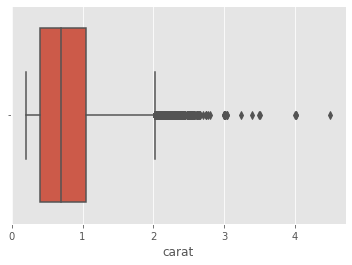

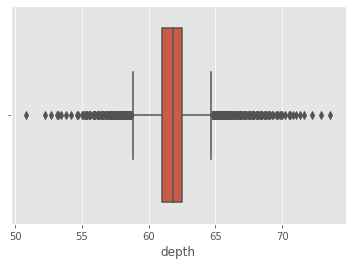

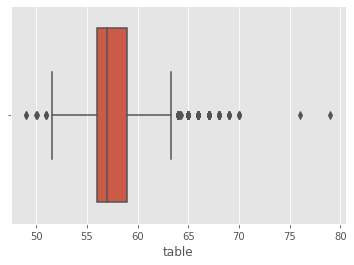

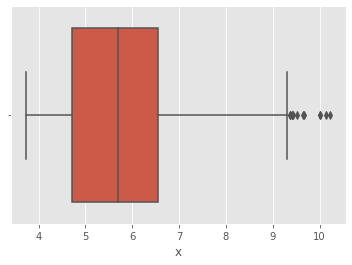

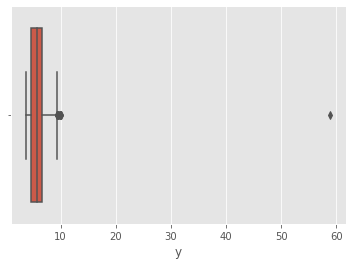

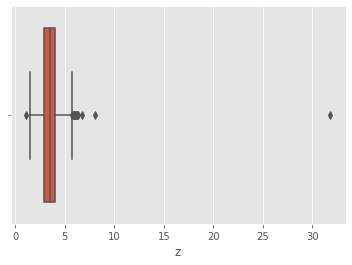

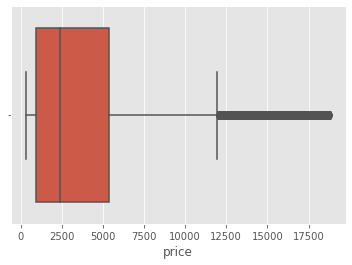

In [64]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(lr_df[i],whis=1.5)
    plt.show();

In [65]:
### Outlier treatment :
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [66]:
for column in lr_df[cols].columns:
    lr,ur=remove_outlier(lr_df[column])
    lr_df[column]=np.where(lr_df[column]>ur,ur,lr_df[column])
    lr_df[column]=np.where(lr_df[column]<lr,lr,lr_df[column])

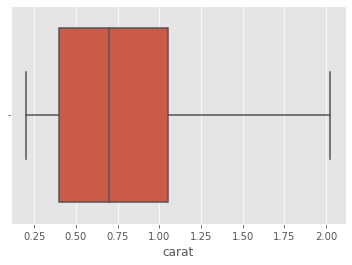

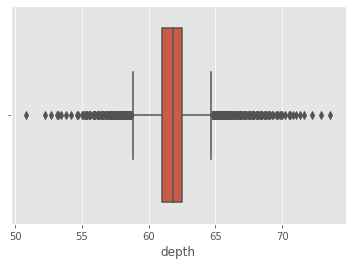

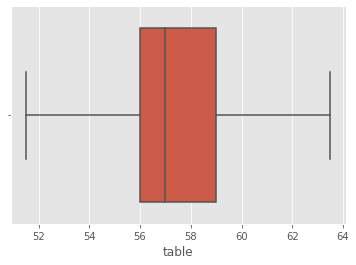

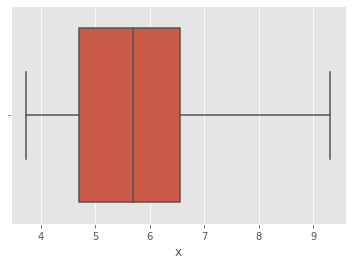

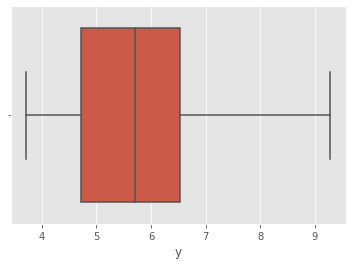

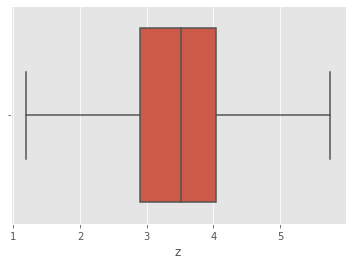

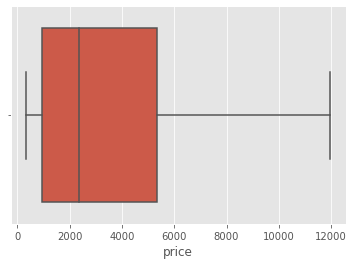

In [67]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(lr_df[i],whis=1.5)
    plt.show();

### EDA-Step 4 : Univariate Analysis.

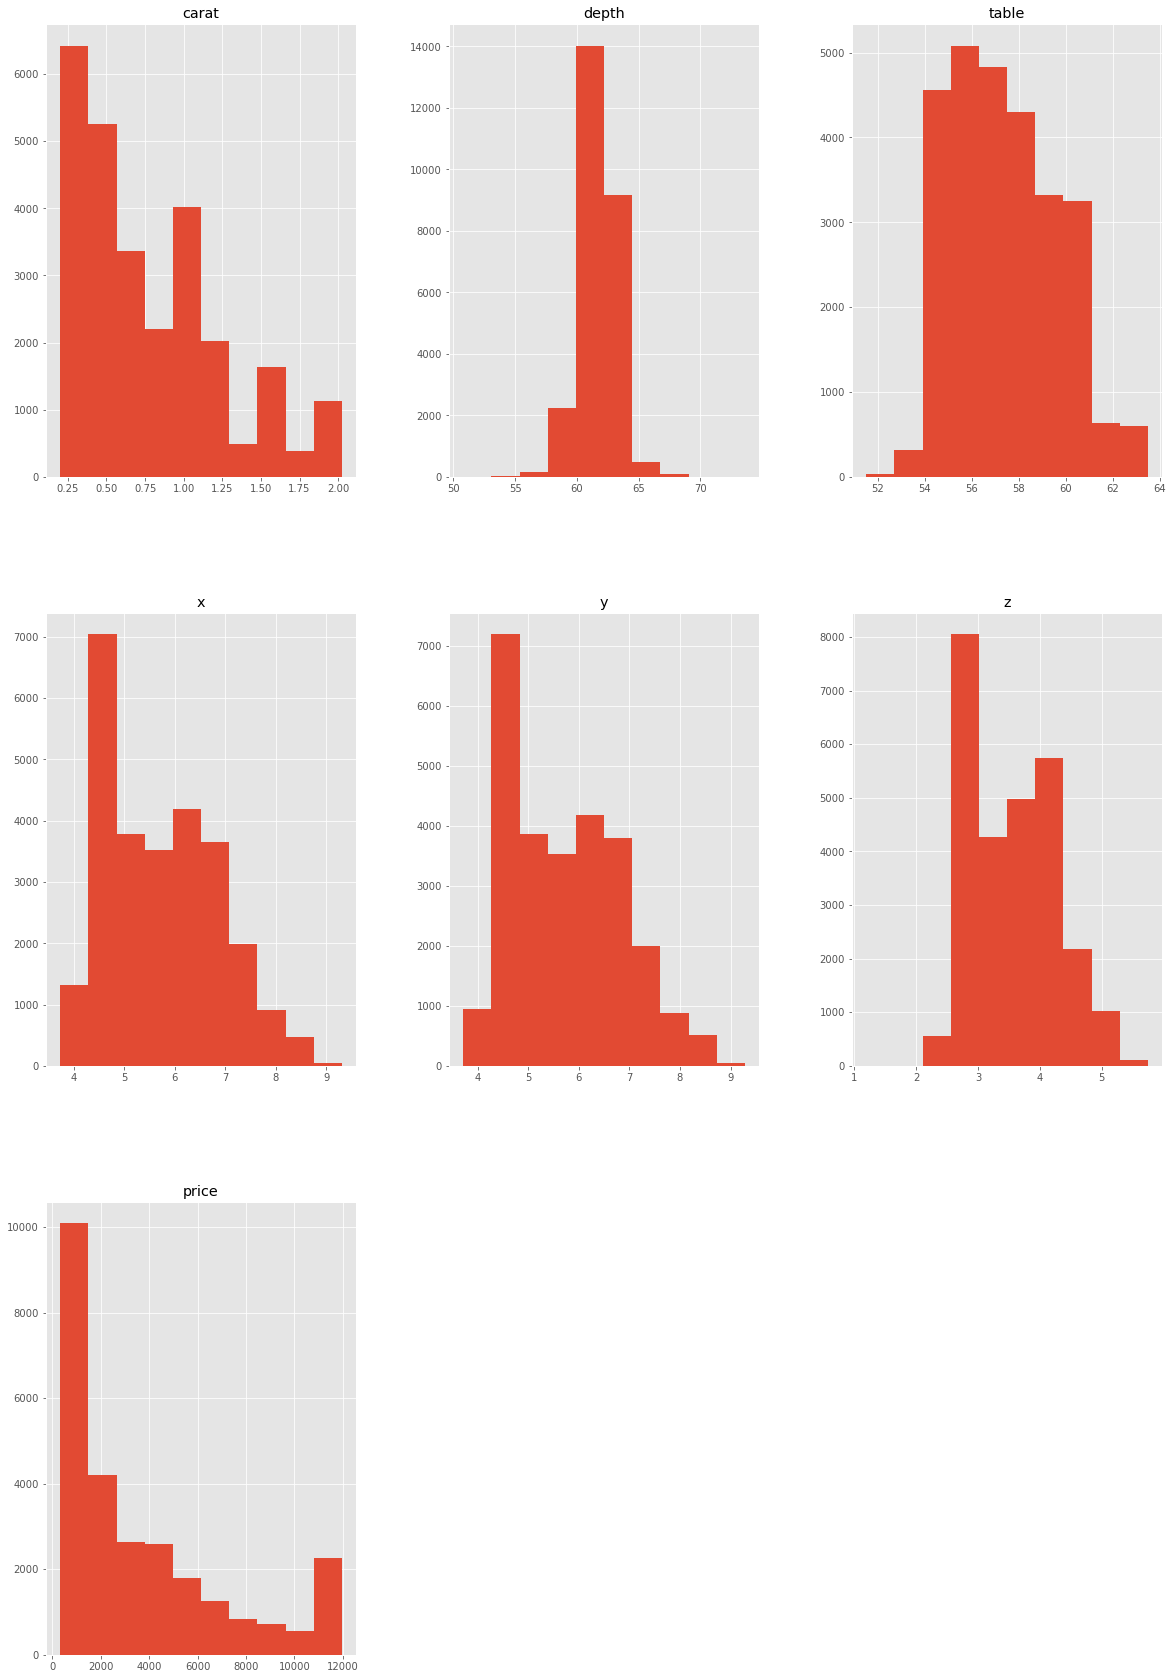

In [68]:
lr_df.hist(figsize=(20,30));

In [69]:
lr_df.skew()   # to measure the skeweness of every attribute.

carat    0.917214
depth   -0.025042
table    0.480476
x        0.397696
y        0.394060
z        0.394819
price    1.157121
dtype: float64

Observation-4: :
(1).There is significant amount of outlier present in some variable. (2) We can see that the distribution of some quantitative features like "carat" and the target feature "price" are heavily "right-skewed".

### EDA-Step 5 : Bivariate Analysis.

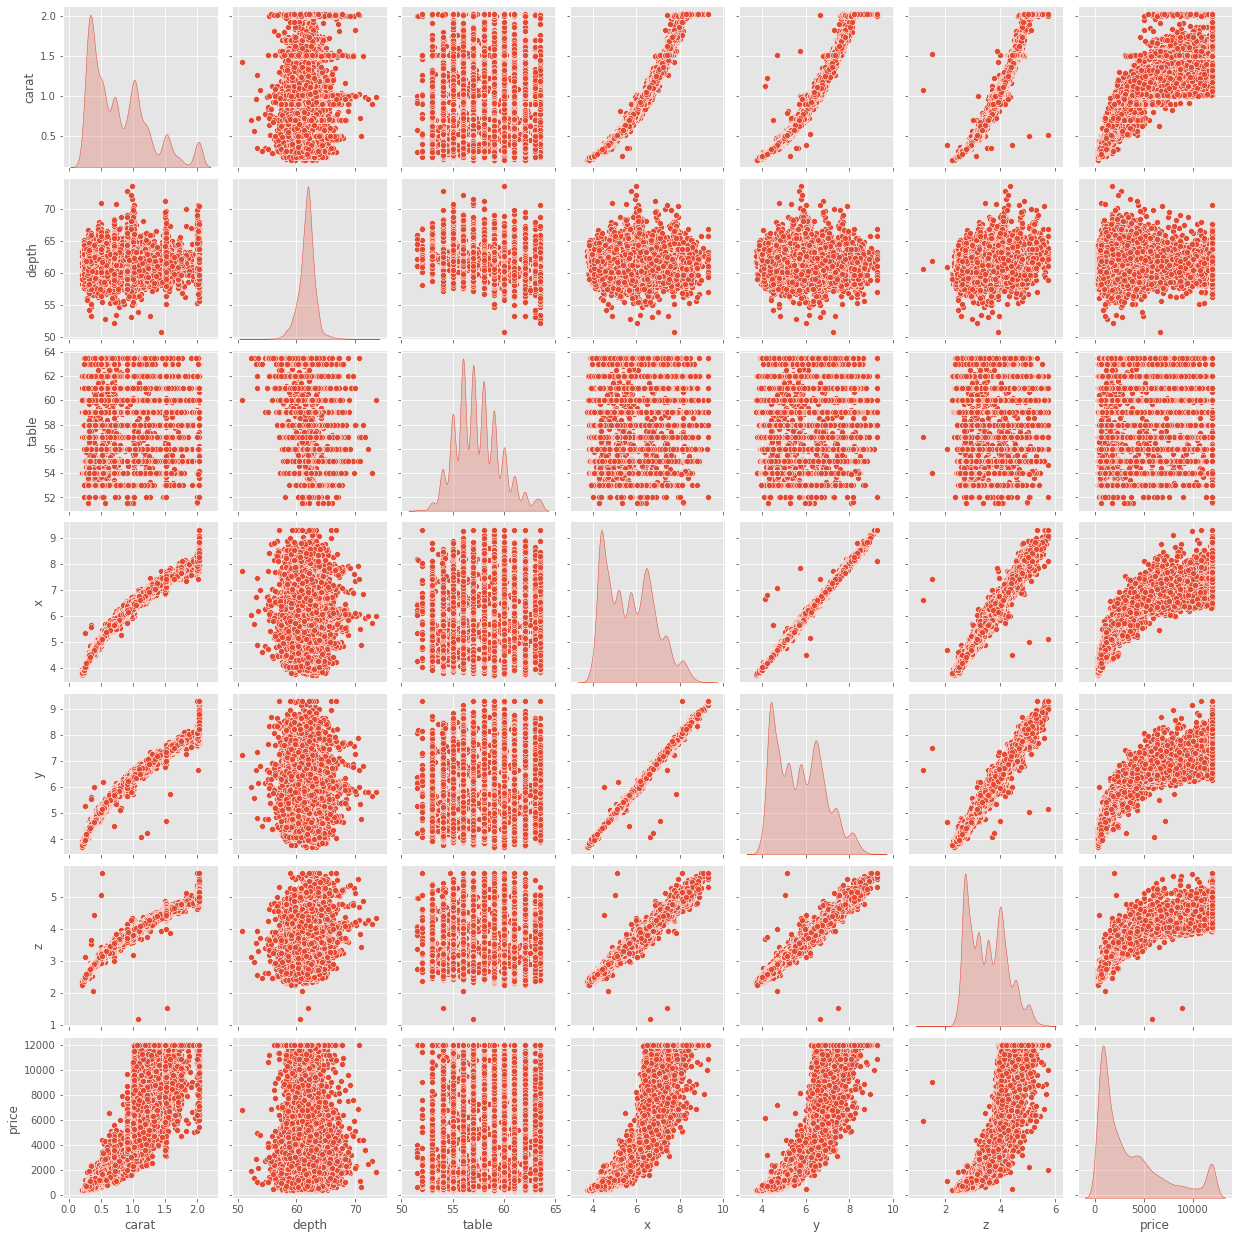

In [70]:
import seaborn as sns

df_attr = ( lr_df[cols])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

Get the Correlation Heatmap

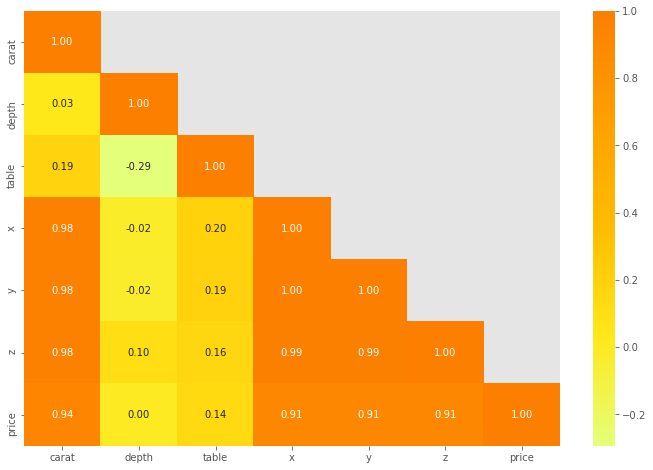

In [72]:
plt.figure(figsize=(12,8))
sns.heatmap(lr_df.corr(),annot=True,fmt='.2f',cmap='Wistia',mask=np.triu(lr_df.corr(),+1))
plt.show()

How each feature affects the price of diamonds.

Observation-5:¶
It can be inferred that most features correlate with the price of Diamond. The notable exception is "depth" which has a negligible correlation (<1%).

### EDA for Categorical variable.

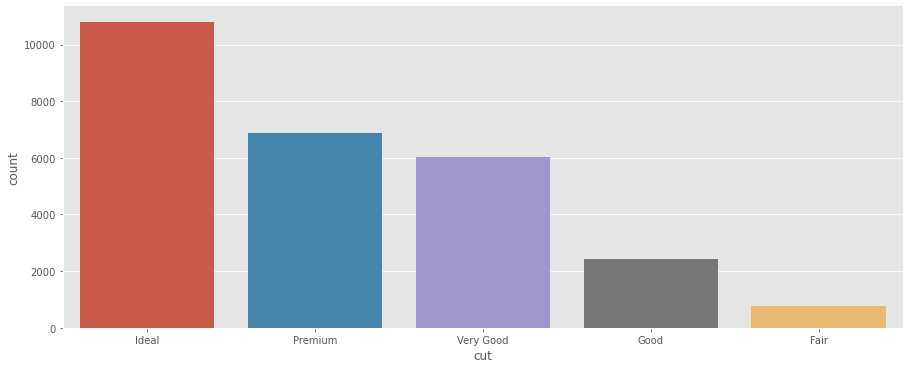

In [74]:
# EDA for categorical columns 'CUT'.
sns.catplot('cut', data=lr_df, kind='count',aspect=2.5);

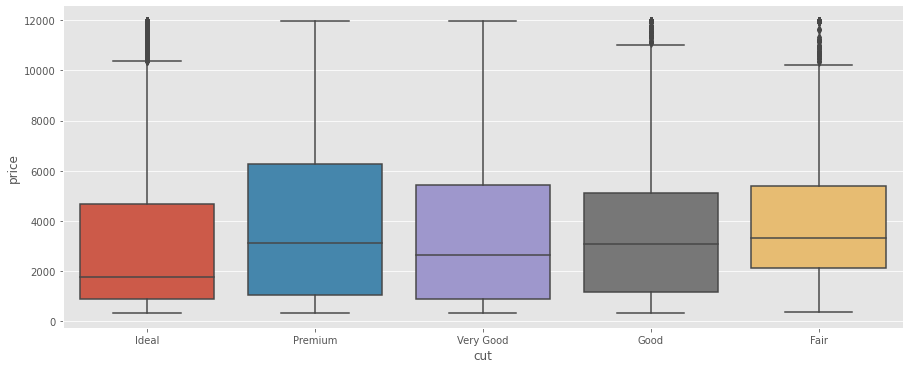

In [75]:
sns.catplot(x='cut', y='price', kind='box', data=lr_df, aspect=2.5);

Observation on 'CUT': The Premium Cut on Diamonds are the most Expensive, followed by Very Good Cut.

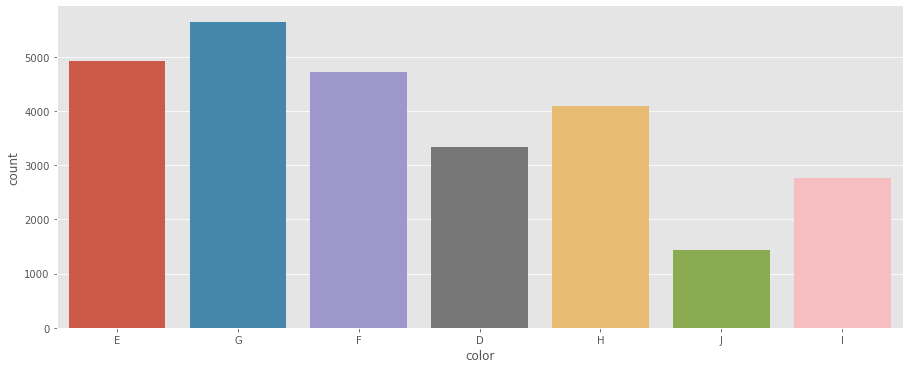

In [77]:
# EDA for categorical columns 'Color'.
sns.catplot('color', kind='count', data=lr_df, aspect=2.5);

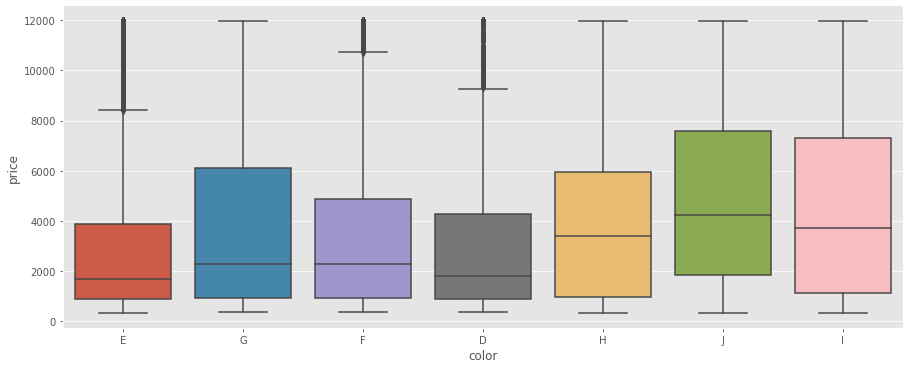

In [79]:
sns.catplot(x='color', y='price', data=lr_df, aspect =2.5, kind='box');

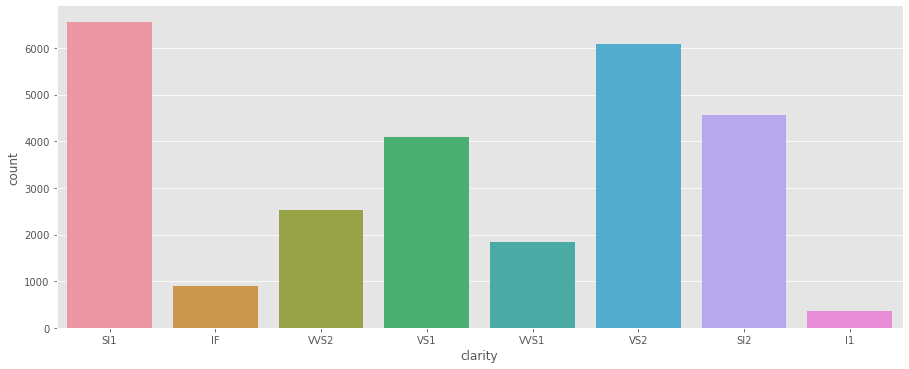

In [80]:
# EDA for categorical columns 'Clarity'.
sns.catplot('clarity', data=lr_df, kind='count',aspect=2.5);

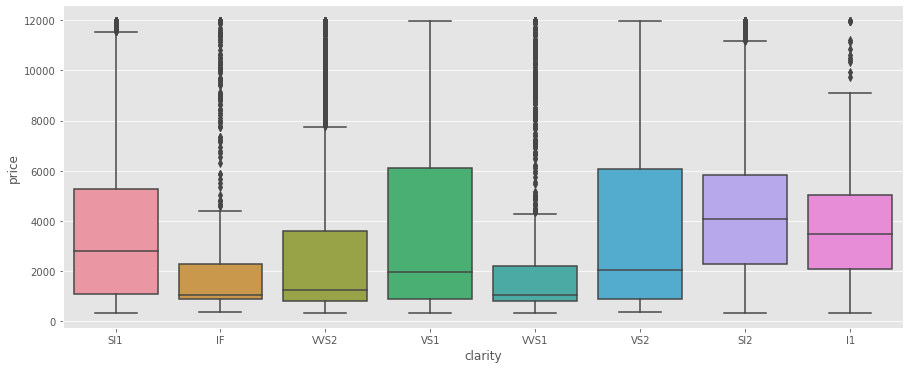

In [81]:
sns.catplot(x='clarity', y='price', data=lr_df, aspect =2.5, kind='box');

Observation on 'clarity': The Diamonds clarity with VS1 & VS2 are the most Expensive.

The inferences drawn from the above Exploratory Data analysis:
Observation-1:
(1).'Price' is the target variable while all others are the predictors. (2).The data set contains 26967 row, 11 column. (3).In the given data set there are 2 Integer type features,6 Float type features. 3 Object type features. Where 'price' is the target variable and all other are predector variable. (4)The first column is an index ("Unnamed: 0")as this only serial no, we can remove it.

Observation-2: (1).On the given data set the the mean and median values does not have much differenc. (2).We can observe Min value of "x", "y", "z" are zero this indicates that they are faulty values. As we know dimensionless or 2-dimensional diamonds are not possible. So we have filter out those as it clearly faulty data entries. (3).There are three object data type 'cut', 'color' and 'clarity'.

Observation-3: we can observe there are 697 missing value in the depth column. There are some duplicate row present. (33 duplicate rows out of 26958). which is nearly 0.12 % of the total data. So on this case we have dropped the duplicated row.

Observation-4: :
There are significant amount of outlier present in some variable,the features with datapoint that are far from the rest of dataset which will affect the outcome of our regression model. So we have treat the outliar. We can see that the distribution of some quantitative features like "carat" and the target feature "price" are heavily "right-skewed".

Observation-5:
It looks like most features do correlate with the price of Diamond. The notable exception is "depth" which has a negligble correlation (~1%). Observation on 'CUT': The Premium Cut on Diamonds are the most Expensive, followed by Very Good Cut.

1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [82]:
# As we have checked there Are some missing values.
lr_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [83]:
lr_df.median()

carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.70
z           3.52
price    2373.00
dtype: float64

Imputing missing values

In [85]:
#lets replace the missing values with median value. 
lr_df = lr_df.fillna(lr_df.median())

In [86]:
lr_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

Checking for the values which are equal to zero.
In Qs.1.1 we have alrady check for 'Zero' value. and we can observe there are some amount of 'Zero' value present on the data set on variable 'x', 'y','z'.

This indicates that they are faulty values.

As we know dimensionless or 2-dimensional diamonds are not possible. So we have filter out those as it clearly faulty data entries.

In [87]:
lr_df.shape # after removing 'zero value' from data set the data shape became as follows.

(26925, 10)

Do you think scaling is necessary in this case?
Scaling or Standardizing the features around the centre and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bias.

For example, A variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization will give the variable with the larger range weight of 1000 in the analysis. Transforming the data to comparable scales can prevent this problem.

In this data set we can see the all the variable are in different scale i.e price are in 1000s unit and depth and table are in 100s unit, and carat is in 10s. So its necessary to scale or standardise the data to allow each variable to be compared on a common scale. With data measured in different "units" or on different scales (as here with different means and variances) this is an important data processing step if the results are to be meaningful or not dominated by the variables that have large variances.

But is scaling necessary in this case?
No, it is not necessary, we'll get an equivalent solution whether we apply some kind of linear scaling or not. But recommended for regression techniques as well because it would help gradient descent to converge fast and reach the global minima. When number of features becomes large, it helps is running model quickly else the starting point would be very far from minima, if the scaling is not done in preprocessing.

For now we will process the model without scaling and later we will check the output with scaled data of regression model output.

1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.
Encode the data (having string values)
Geting unique counts of all Objects.

In [88]:
print('cut\n',lr_df.cut.value_counts())
print('\n')
print('color\n',lr_df.color.value_counts())
print('\n')
print('clarity\n',lr_df.clarity.value_counts())
print('\n')

cut
 Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64


color
 G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
 SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64




Converting objects to categorical codes.

In [89]:
lr_df['cut']=np.where(lr_df['cut'] =='Ideal', '4', lr_df['cut'])
lr_df['cut']=np.where(lr_df['cut'] =='Premium', '3', lr_df['cut'])
lr_df['cut']=np.where(lr_df['cut'] =='Very Good', '2', lr_df['cut'])
lr_df['cut']=np.where(lr_df['cut'] =='Good', '1', lr_df['cut'])
lr_df['cut']=np.where(lr_df['cut'] =='Fair', '0', lr_df['cut'])

In [90]:
lr_df['color']=np.where(lr_df['color'] =='D', '6', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='E', '5', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='F', '4', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='G', '3', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='H', '2', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='I', '1', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='J', '0', lr_df['color'])

In [91]:
lr_df['clarity']=np.where(lr_df['clarity'] =='IF', '7', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='VVS1', '6', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='VVS2', '5', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='VS1', '4', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='VS2', '3', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='SI1', '2', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='SI2', '1', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='I1', '0', lr_df['clarity'])

In [92]:
lr_df.dtypes # The'cut','color','clarity' column still showing as 'Object'.

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [93]:
# converting the'cut','color','clarity' column from object / string type to float.

lr_df['cut'] = lr_df['cut'].astype('float64')
lr_df['color'] = lr_df['color'].astype('float64')
lr_df['clarity'] = lr_df['clarity'].astype('float64')

In [94]:
lr_df.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [95]:
lr_df.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65,779.0
5,1.02,4.0,6.0,3.0,61.5,56.0,6.46,6.49,3.99,9502.0
6,1.01,1.0,2.0,2.0,63.7,60.0,6.35,6.30,4.03,4836.0
7,0.50,3.0,5.0,2.0,61.5,62.0,5.09,5.06,3.12,1415.0
8,1.21,1.0,2.0,2.0,63.8,63.5,6.72,6.63,4.26,5407.0
9,0.35,4.0,4.0,3.0,60.5,57.0,4.52,4.60,2.76,706.0


### Train-Test Split:

In [96]:
# Copy all the predictor variables into X dataframe
X = lr_df.drop('price', axis=1)

# Copy target into the y dataframe.This is the dependent variable
y = lr_df[['price']]
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65


In [97]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [98]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [99]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [100]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8901.941225070892
The coefficient for cut is 109.18812485149351
The coefficient for color is 272.9213296449043
The coefficient for clarity is 436.4411042154921
The coefficient for depth is 8.236971791616131
The coefficient for table is -17.345170384368345
The coefficient for x is -1417.9089304449503
The coefficient for y is 1464.8272701468118
The coefficient for z is -711.2250326814063


### Observation-1: 
Y=mx +c (m= m1,m2,m3...m9) here 9 diferent co-efficients will learn aling with the intercept which is "c" from the model.

From the above coefficients for each of the independent attributes we can conclude
The one unit increase in carat increases price by 8901.941.
The one unit increase in cut increases price by 109.188.
The one unit increase in color increases price by 272.921.
The one unit increase in clarity increases price by 436.441.
The one unit increase in y increases price by 1464.827.
The one unit increase in depth increases price by 8.236,

But The one unit increase in table decreases price by -17.345,
The one unit increase in x decreases price by -1417.908,
The one unit increase in z decreases price by -711.225.

In [101]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3171.950447307818


Observation-2: The intercept (often labelled the constant) is the expected mean value of Y when all X=0. If X never equals 0, then the intercept has no intrinsic meaning.

The intercept for our model is -3171.950447307667. In preset case when the other predictor variable are zero i.e like carat,cut, color, clarity all are zero then the C=-3172. ( Y = m1X1 + m2X2+ ….. + mnXn + C + e) that means price is -3172. which is meaningless. We can do Z score or scaling the data and make it nearly zero.

In [102]:
 # R square on training data
regression_model.score(X_train, y_train)

0.9311935886926559

In [103]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

# R square on testing data
regression_model.score(X_test, y_test)

0.931543712584074

Observation-3:
R-square is the percentage of the response variable variation that is explained by a linear model. Or:

R-square = Explained variation / Total variation

R-squared is always between 0 and 100%: 0% indicates that the model explains none of the variability of the response data around its mean.100% indicates that the model explains all the variability of the response data around its mean. In this regression model we can see the R-square value on Training and Test data respectively 0.9311935886926559 and 0.931543712584074.

In [104]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

907.1312415459143

In [105]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

911.8447345328436

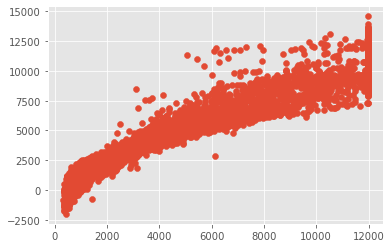

In [106]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['price'], y_pred)

Observation-4:
we can see that the is a linear plot, very strong corelation between the predicted y and actual y. But there are lots of spread. That indicated some kind noise present on the data set i.e Unexplained variances on the output.

Linear regression Performance Metrics:

intercept for the model: -3171.950447307667
R square on training data: 0.9311935886926559
R square on testing data: 0.931543712584074
RMSE on Training data: 907.1312415459143
RMSE on Testing data: 911.8447345328436
As the training data & testing data score are almost inline, we can conclude this model is a Right-Fit Model.

### Applying zscore statsmodels

In [107]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [108]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [109]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1837737061779425
The coefficient for cut is 0.03512500065529727
The coefficient for color is 0.1344926928764154
The coefficient for clarity is 0.20809779325621902
The coefficient for depth is 0.003326293718838802
The coefficient for table is -0.010815851633643356
The coefficient for x is -0.45968984241252664
The coefficient for y is 0.47166270917924114
The coefficient for z is -0.14249737973827084


In [110]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -5.879615251304727e-16


In [111]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)

0.9315051288558229

Observation-5:
Now we can observe by applying z score the intercept became -5.87961525130473e-16. Earlier it was -3171.950447307667. the co-efficient has changed, the bias became nearly zero but the overall accuracy still same.

Check Multi-collinearity using VIF

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [114]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 121.96543302739589
cut ---> 10.388738909800333
color ---> 5.546407587131623
clarity ---> 5.455999699082339
depth ---> 1218.3824913329145
table ---> 878.3985698779234
x ---> 10744.05623520385
y ---> 9482.053091580401
z ---> 3697.5688286012546


We can observe there are very strong multi collinearity present in the data set. Ideally it should be within 1 to 5.

We are exploring the Linear Regression using statsmodels as we are interested in some more statistical metrics of the model.
Linear Regression using statsmodels.
concatenate X and y into a single dataframe

In [115]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,1.10,1.0,5.0,1.0,63.3,56.0,6.53,6.58,4.15,4065.0
12108,1.01,2.0,6.0,1.0,64.0,56.0,6.30,6.38,4.06,5166.0
20181,0.67,1.0,1.0,3.0,60.7,61.4,5.60,5.64,3.41,1708.0
4712,0.76,1.0,3.0,2.0,57.7,63.0,6.05,5.97,3.47,2447.0
2548,1.01,3.0,3.0,4.0,62.8,59.0,6.37,6.34,3.99,6618.0


In [116]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept   -3171.950447
carat        8901.941225
cut           109.188125
color         272.921330
clarity       436.441104
depth           8.236972
table         -17.345170
x           -1417.908930
y            1464.827270
z            -711.225033
dtype: float64

In [117]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.833e+04
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        03:21:28   Log-Likelihood:            -1.5510e+05
No. Observations:               18847   AIC:                         3.102e+05
Df Residuals:                   18837   BIC:                         3.103e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3171.9504    787.532     -4.028      0.0

Observation-6:
Assuming null hypothesis is true, i.e there is no relationship between this variable with price. from that universe we have drawn the sample and on this sample we have found this co-efficient for the variable shown above.

Now we can ask what is the probability of finding this co-efficient in this drawn sample if in the real world the co-efficient is zero. As we see here the overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not '0'. Here all regression co-efficients are not '0'.

For an example: we can see the p value is showing 0.449 for 'depth' variable, which is much higher than 0.05. That means this dimension is useless. So we can say that the attribute which are having p value greater than 0.05 are poor predictor for price.

In [118]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [119]:
# Calculate MSE
mse1 = np.mean((lm1.predict(data_test.drop('price',axis=1))-data_test['price'])**2)

In [120]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

907.1312415459137

In [121]:
#Root Mean Squared Error - RMSE
np.sqrt(mse1)

911.8447345328424

In [122]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

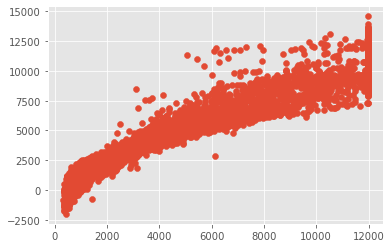

In [123]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [124]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-3171.95) * Intercept + (8901.94) * carat + (109.19) * cut + (272.92) * color + (436.44) * clarity + (8.24) * depth + (-17.35) * table + (-1417.91) * x + (1464.83) * y + (-711.23) * z + 

The final Linear Regression equation is
price = b0 + b1 *carat[T.True] + b2 * cut + b3 * color + b4 * clarity+ b5 * depth + b6 * table + b7 * x + b8 * y + b9 *z True

price = (-3171.95) * Intercept + (8901.94) * carat + (109.19) * cut + (272.92) * color + (436.44) * clarity + (8.24) * depth + (-17.35) * table + (-1417.91)) * x + (1464.83) * y + (-711.23) * z _True

When carat increases by 1 unit, diamond price increases by 8901.94 units, keeping all other predictors constant.
When cut increases by 1 unit, diamond price increases by 109.19 units, keeping all other predictors constant.
When color increases by 1 unit, diamond price increases by 272.92 units, keeping all other predictors constant.
When clarity increases by 1 unit, diamond price increases by 436.44 units, keeping all other predictors constant.
When y increases by 1 unit, diamond price increases by 1464.83 units, keeping all other predictors constant.
As per model these five attributes that are most important attributes 'Carat', 'Cut', 'color','clarity' and width i.e 'y' for predicting the price.

There are also some negative co-efficient values, for instance, corresponding co-efficient (-1417.91) for 'x',(-711.23) for z and (-17.35) for table This implies, these are inversely proportional with diamond price.

Observation-7:
On the given data set we can see the 'X' i.e Length of the cubic zirconia in mm. having negative co-efficient. And the p value is less than 0.05, so can conclude that as higher the length of the stone is a lower profitable stones.

Similarly for the 'z' variable having negative co-efficient i.e -711.23. And the p value is less than 0.05, so we can conclude that as higher the 'z' of the stone is a lower profitable stones.

Also we can see the 'y' width in mm having positive co-efficient. And the p value is less than 0.05, so we can conclude that higher the width of the stone is a higher profitable stones.

Finally we can conclude that best 5 attributes that are most important are 'Carat', 'Cut', 'color','clarity' and width i.e 'y' for predicting the price.

### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

Inference:
we can see that the from the linear plot, very strong corelation between the predicted y and actual y. But there are lots of spread. That indicates some kind noise present on the data set i.e Unexplained variances on the output.

Linear regression Performance Metrics:

intercept for the model: -3171.950447307667
R square on training data: 0.9311935886926559
R square on testing data: 0.931543712584074
RMSE on Training data: 907.1312415459143
RMSE on Testing data: 911.8447345328436
As the training data & testing data score are almost inline, we can conclude this model is a Right-Fit Model.

Impact of scaling:
Now we can observe by applying z score the intercept became -5.87961525130473e-16. Earlier it was -3171.950447307667. the co-efficient has changed, the bias became nearly zero but the overall accuracy still same.

Multi collinearity:
We can observe there are very strong multi collinearity present in the data set.

From statsmodels:
we can see R-squared:0.931 and Adj. R-squared: 0.931 are same. The overall P value is less than alpha.

Finally we can conclude that Best 5 attributes that are most important are 'Carat', 'Cut', 'color','clarity' and width i.e 'y' for predicting the price.

When 'carat' increases by 1 unit, diamond price increases by 8901.94 units, keeping all other predictors constant.
When 'cut' increases by 1 unit, diamond price increases by 109.19 units, keeping all other predictors constant.
When 'color' increases by 1 unit, diamond price increases by 272.92 units, keeping all other predictors constant.
When 'clarity' increases by 1 unit, diamond price increases by 436.44 units, keeping all other predictors constant.
When 'y' increases by 1 unit, diamond price increases by 1464.83 units, keeping all other predictors constant.

we can see the p value is showing 0.449 for depth variable, which is much greater than 0.05. That means this attribute is useless.

There are also some negative co-efficient values, we can see the 'X' i.e Length of the cubic zirconia in mm. having negative co-efficient -1417.9089. And the p value is less than 0.05, so can conclude that as higher the length of the stone is a lower profitable stones.

Similarly for the 'z' variable having negative co-efficient i.e -711.23. And the p value is less than 0.05, so we can conclude that as higher the 'z' of the stone is a lower profitable stones.

Recommendations:
The Gem Stones company should consider the features'Carat', 'Cut', 'color','clarity' and width i.e 'y' as most important for predicting the price.
To distinguish between higher profitable stones and lower profitable stones so as to have better profit share.

As we can see from the model Higher the width('y') of the stone is higher the price.

So the stones having higher width('y') should consider in higher profitable stones.
The 'Premium Cut' on Diamonds are the most Expensive, followed by 'Very Good' Cut, these should consider in higher profitable stones.

The Diamonds clarity with 'VS1' &'VS2' are the most Expensive.So these two category also consider in higher profitable stones.

As we see for 'X' i.e Length of the stone, higher the length of the stone is lower the price.

So higher the Length('x') of the stone are lower is the profitability.
higher the 'z' i.e Height of the stone is, lower the price.This is because if a Diamond's Height is too large Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light. That is why

Stones with higher 'z' is also are lower in profitability.